**Data Science  Assignment**
---


STD Name:Mohammed Yehia Ashour

---


STD ID:1301195595

---

[Github](https://)

In [125]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
from pandas.plotting import scatter_matrix

   # *** Preprocessing  Section***:

In [126]:
data=pd.read_csv('University_data.csv',na_values=['?','UNDEFIND'])
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,3,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,4,322.0,110.0,3.0,3.5,2.5,NaN,1.0,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324.0,110.0,NaN,3.5,3.5,9.04,NaN,0.82
396,397,325.0,107.0,3.0,3.0,NaN,9.11,NaN,0.84
397,398,330.0,116.0,4.0,5.0,4.5,9.45,1.0,0.91
398,399,312.0,103.0,3.0,3.5,4.0,8.78,0.0,0.67


In [127]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          373 non-null    float64
 2   TOEFL Score        382 non-null    float64
 3   University Rating  375 non-null    float64
 4   SOP                384 non-null    float64
 5   LOR                382 non-null    float64
 6   CGPA               384 non-null    float64
 7   Research           385 non-null    float64
 8   Chance of Admit    400 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 28.2 KB


In [128]:
print("Check if Data Contain A null Value")

print(data.isnull().sum())
data.isnull()


Check if Data Contain A null Value
Serial No.            0
GRE Score            27
TOEFL Score          18
University Rating    25
SOP                  16
LOR                  18
CGPA                 16
Research             15
Chance of Admit       0
dtype: int64


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
395,False,False,False,True,False,False,False,True,False
396,False,False,False,False,False,True,False,True,False
397,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False


In [129]:
mask=data.isnull().any(axis=0)
mask.head(10)



Serial No.           False
GRE Score             True
TOEFL Score           True
University Rating     True
SOP                   True
LOR                   True
CGPA                  True
Research              True
Chance of Admit      False
dtype: bool

In [130]:
total_num_null=mask.sum()/len(data)
total_num_null

0.0175

In [165]:
data=data.fillna({'GRE Score':data['GRE Score'].mean()})
data=data.fillna({'TOEFL Score':data['TOEFL Score'].mean()})
#counter = Counter(data["University Rating"])
#print(counter.most_common(3)[0][0])
#data["University Rating"].fillna( method ='ffill', inplace = True)
#data=data.fillna({'University Rating':data['University Rating'].mean()})
data=data.fillna({'SOP':data['SOP'].mean()})
data=data.fillna({'LOR ':data['LOR '].mean()})
data=data.fillna({'CGPA':data['CGPA'].mean()})

data


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.000,4.5,4.500000,9.650000,1.0,0.92
1,2,324.0,107.0,4.000,4.0,4.500000,8.870000,1.0,0.76
2,3,316.0,104.0,3.000,3.0,3.500000,8.000000,1.0,0.72
3,4,322.0,110.0,3.000,3.5,2.500000,8.603672,1.0,0.80
4,5,314.0,103.0,2.000,2.0,3.000000,8.210000,0.0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324.0,110.0,3.096,3.5,3.500000,9.040000,1.0,0.82
396,397,325.0,107.0,3.000,3.0,3.447644,9.110000,1.0,0.84
397,398,330.0,116.0,4.000,5.0,4.500000,9.450000,1.0,0.91
398,399,312.0,103.0,3.000,3.5,4.000000,8.780000,0.0,0.67


In [132]:
mask=data.isnull().any(axis=0)

mask.head(10)


Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research              True
Chance of Admit      False
dtype: bool

In [167]:
counter = Counter(data["Research"])
print(counter.most_common(3)[0][0])
data["Research"].fillna( method ='ffill', inplace = True)
counter2 = Counter(data["University Rating"])
data["Research"].fillna( method ='ffill', inplace = True)


1.0


In [134]:
mask=data.isnull().any(axis=0)
print("Check if Data Contain A null Value")

print(data.isnull().sum())
mask.head(10)

Check if Data Contain A null Value
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

   # *** Visualization Section***:

*Heatmap*

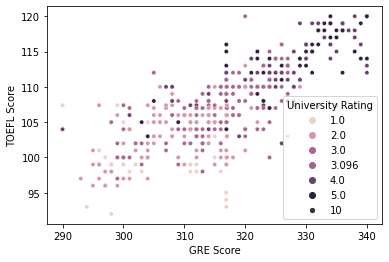

In [166]:
sns.scatterplot(x='GRE Score', y='TOEFL Score', data=data,hue="University Rating",color='purple', size=10)
plt.show()

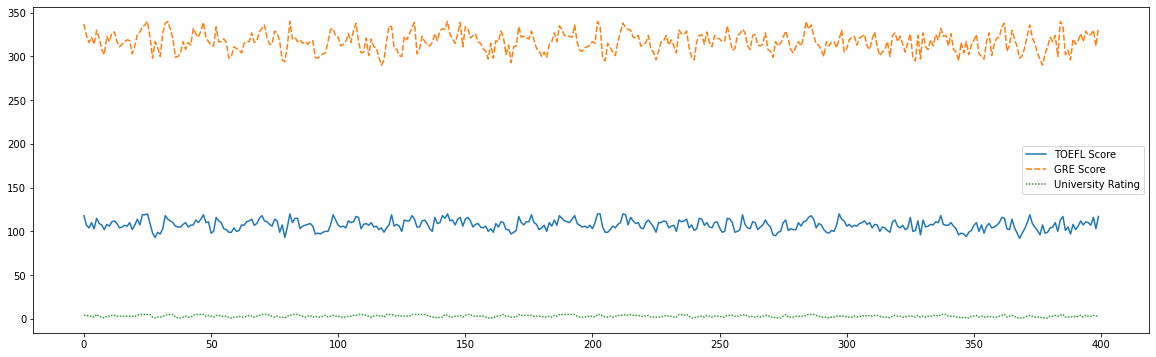

In [150]:
plt.figure(figsize=(20,6))

sns.lineplot(data=data[["TOEFL Score","GRE Score","University Rating"]])

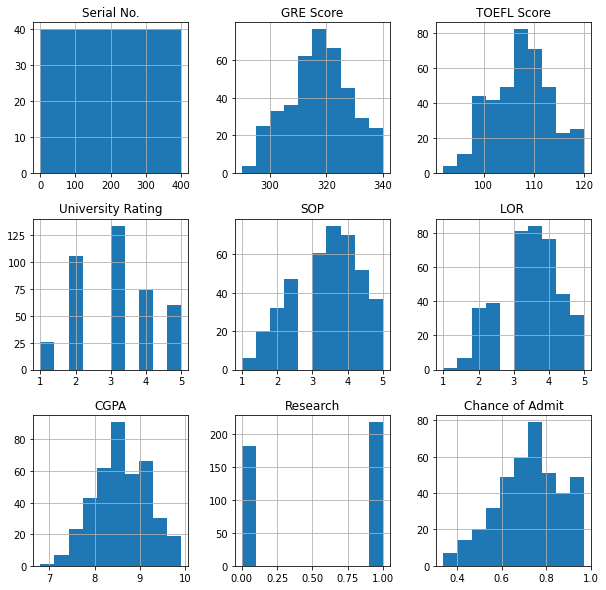

In [135]:
data.hist(figsize=(10,10))
plt.show()

Text(0, 0.5, 'Chance of Admit')

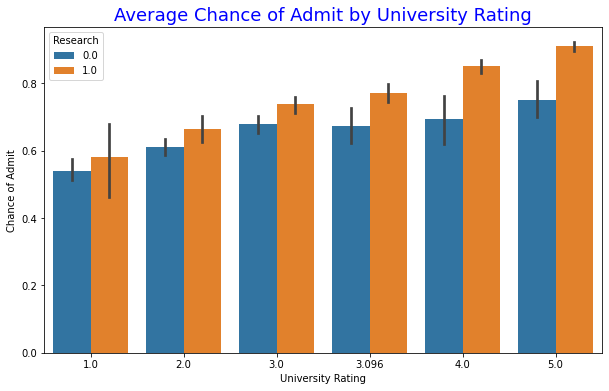

In [136]:
plt.figure(figsize=(10,6))

# Add title
plt.title('Average Chance of Admit by University Rating', fontsize=18, color='blue')

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(data=data, x='University Rating', y='Chance of Admit', hue='Research')
# Add label for vertical axis
plt.ylabel("Chance of Admit")

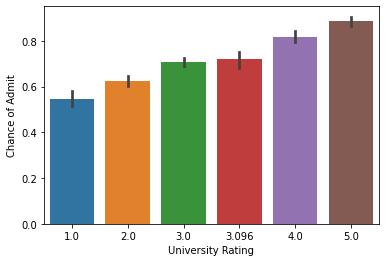

In [137]:
sns.barplot(data=data, x='University Rating', y='Chance of Admit')

<Figure size 720x432 with 0 Axes>

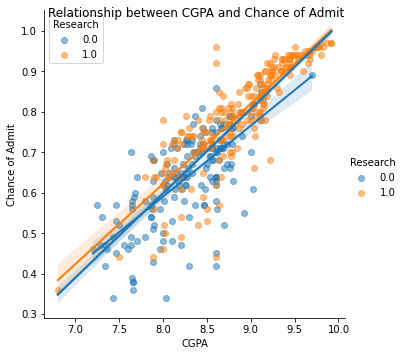

In [138]:
plt.figure(figsize=(10,6))

#sns.lmplot(data=data, x='CGPA', y='Chance of Admit',hue="Research"
# Create the plot
ax = sns.lmplot(data=data, x='CGPA', y='Chance of Admit', hue='Research', scatter_kws={'alpha': 0.5}, line_kws={'linewidth': 2})

# Add a title
plt.suptitle('Relationship between CGPA and Chance of Admit')
# Label the axes

plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')

# Add a legend
plt.legend(title='Research')

# Add statistical annotations
sns.regplot(data=data, x='CGPA', y='Chance of Admit', ci=95, scatter=False)

The resulting plot will show a scatter plot with a fitted regression line for each 'Research' category, with the 'CGPA' values on the x-axis and the 'Chance of Admit' values on the y-axis. The regression lines will show the trend of the data and can be used to predict the 'Chance of Admit' based on the 'CGPA' values. The plot will also show the distribution of the data points for each 'Research' category, with different colors or marker styles used to differentiate the categories

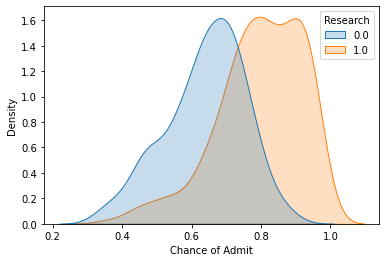

In [139]:
sns.kdeplot(data=data, x='Chance of Admit', hue='Research', shade=True)



This visualization shows that the distribution of 'Chance of Admit' is slightly higher for students who have completed research compared to students who have not completed research. This suggests that students who have completed research may have a slightly higher chance of admission to the university. However, it is important to note that this is a continuous variable, and the confidence intervals for each category overlap significantly, so the difference in the mean values may not be statistically significant.

Additionally, the visualization plot shows that the majority of students have a chance of admission between 0.6 and 0.8, with fewer students having a chance above 0.8 or below 0.6. This suggests that most students have a relatively similar chance of admission, with a few students having a higher or lower chance.


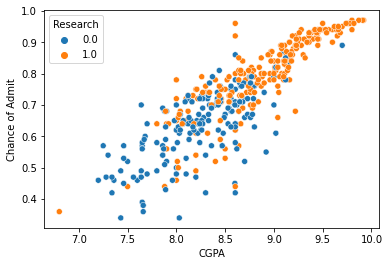

In [140]:
sns.scatterplot(x=data['CGPA'], y=data['Chance of Admit'], hue=data['Research'])

Chance of Admit'. It shows that as the CGPA increases, the chance of admission also tends to increase.

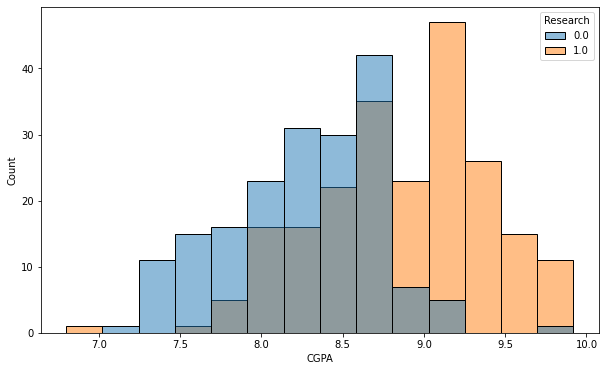

In [141]:
plt.figure(figsize=(10,6))

sns.histplot(data=data, x='CGPA', hue='Research')


Text(0, 0.5, 'Chance of Admit')

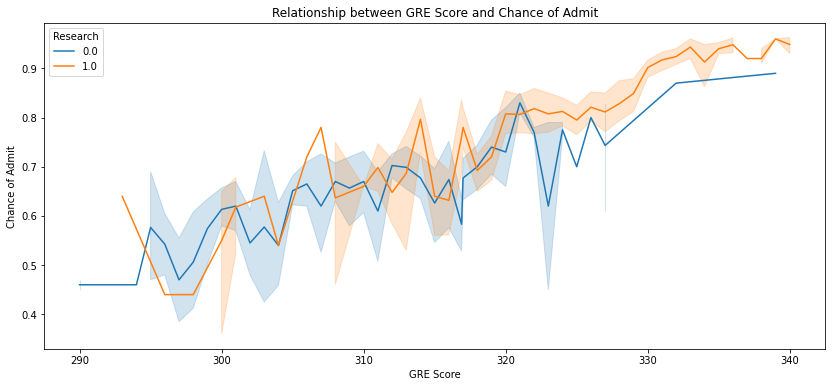

In [142]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title('Relationship between GRE Score and Chance of Admit')
sns.lineplot(data=data, x='GRE Score', y='Chance of Admit', hue='Research')
# Add label for horizontal axis
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admit")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2126f56940>,
      dtype=object)

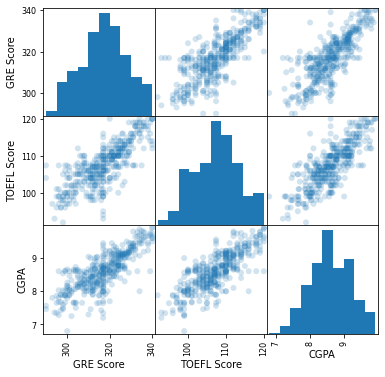

In [143]:
scatter_matrix(data[['GRE Score', 'TOEFL Score', 'CGPA']], alpha=0.2, figsize=(6, 6), diagonal='hist', marker='o')


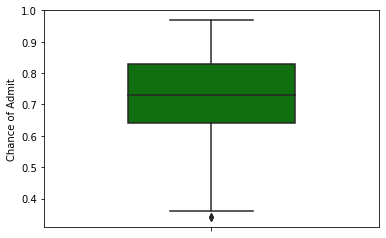

In [146]:
sns.boxplot(data=data, y='Chance of Admit', color='green', width=0.5)

The box in the plot represents the interquartile range (IQR) of the 'Chance of Admit' values, which is the range between the first quartile (25th percentile) and the third quartile (75th percentile). The line inside the box represents the median value (50th percentile). The whiskers extend from the box to show the minimum and maximum values, which are the lowest and highest values within 1.5 times the IQR of the median. Any points outside the whiskers are considered outliers and are plotted separately as individual points.

By interpreting the boxplot, you can get a sense of the spread and skewness of the 'Chance of Admit' values in the dataset, as well as identify any potential outliers. For example, if the box is narrow and the whiskers are short, it indicates that the values are concentrated around the median and there are few outliers. If the box is wide and the whiskers are long, it indicates that the values